In [4]:
import numpy as np
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV

In [5]:
df=datasets.load_iris()

In [6]:
Cs=np.logspace(-2,2,100)
parameters={'kernel':('linear','rbf'),'C':Cs}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)

In [7]:
clf.fit(df.data,df.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-0...
       1.17681195e+01, 1.29154967e+01, 1.41747416e+01, 1.55567614e+01,
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                         'kernel': ('linear', 'rbf')})

In [8]:
clf.cv_results_

{'mean_fit_time': array([0.00219784, 0.00220118, 0.00099988, 0.00239878, 0.00201259,
        0.0019969 , 0.00099888, 0.00119948, 0.00119901, 0.00159893,
        0.00099969, 0.00139914, 0.00119948, 0.00139861, 0.00099936,
        0.00179911, 0.00079927, 0.00180278, 0.00099959, 0.00159926,
        0.00099974, 0.00139918, 0.00079966, 0.00179844, 0.00059962,
        0.00159907, 0.0009995 , 0.00139933, 0.0009995 , 0.00179882,
        0.00099931, 0.00179901, 0.00099893, 0.00139933, 0.00119944,
        0.00159945, 0.00099945, 0.00139914, 0.0009994 , 0.00159979,
        0.00099912, 0.00159893, 0.00059972, 0.00099916, 0.00059972,
        0.00119953, 0.00059967, 0.0011992 , 0.00039978, 0.00139875,
        0.00059981, 0.00139933, 0.00099936, 0.0009994 , 0.00080013,
        0.00159469, 0.00099921, 0.00119882, 0.00079937, 0.00119905,
        0.00099931, 0.0009994 , 0.0007998 , 0.00099912, 0.00059996,
        0.00139585, 0.00059972, 0.00099955, 0.00039973, 0.00099945,
        0.00079956, 0.00119929,

In [9]:
clf.best_params_

{'C': 0.5462277217684343, 'kernel': 'linear'}

In [10]:
clf.best_score_

0.9866666666666667

In [11]:
clf.best_estimator_.C

0.5462277217684343

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [13]:
X=df.data
y=df.target
class_names=df.target_names

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=10)

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Confusion Matrix (SVC), without normalization
[[18  0  0]
 [ 0 22  2]
 [ 0  0 18]]
Normalized Confusion Matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.   1.  ]]


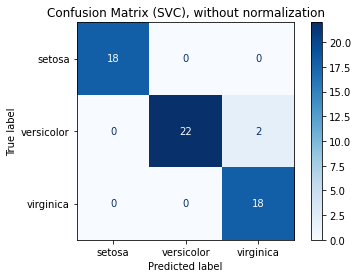

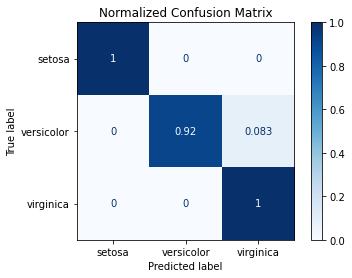

In [16]:
#Kernel=linear which minimizes the regular hinge loss
classifier=svm.SVC(kernel='linear',C=clf.best_estimator_.C).fit(X_train,y_train)
np.set_printoptions(precision=2)
titles_options=[("Confusion Matrix (SVC), without normalization", None),("Normalized Confusion Matrix", 'true')]
for title,normalize in titles_options:
    disp=plot_confusion_matrix(classifier,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [17]:
print_score(classifier,X_train, y_train, X_test, y_test, train=True)
print_score(classifier,X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.78%
_______________________________________________
CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   1.000000   0.941176  0.977778   0.980392      0.979085
recall      1.0   0.923077   1.000000  0.977778   0.974359      0.977778
f1-score    1.0   0.960000   0.969697  0.977778   0.976566      0.977670
support    32.0  26.000000  32.000000  0.977778  90.000000     90.000000
_______________________________________________
Confusion Matrix: 
 [[32  0  0]
 [ 0 24  2]
 [ 0  0 32]]

Test Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   1.000000   0.900000  0.966667   0.966667      0.970000
recall      1.0   0.916667   1.000000  0.966667   0.972222      0.966667
f1-score    1.0   0.956522   0.947368  0.966667   0.967963      0.966819
support    18.0  24.00

Confusion Matrix (LinearSVC), without normalization
[[18  0  0]
 [ 0 17  7]
 [ 0  0 18]]
Normalized Confusion Matrix
[[1.   0.   0.  ]
 [0.   0.71 0.29]
 [0.   0.   1.  ]]


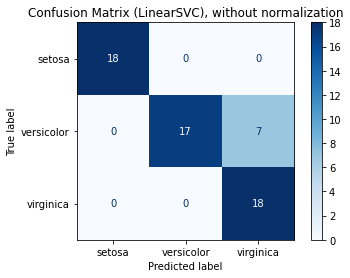

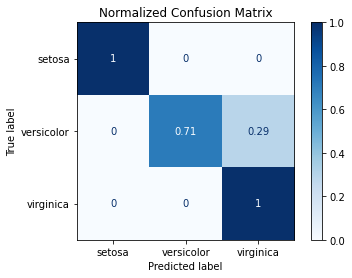

In [18]:
#Kernel=LinearSVC which minimizes the squared hinge loss 
classifier1=svm.LinearSVC(C=0.5462277217684343, max_iter=10000).fit(X_train,y_train)
np.set_printoptions(precision=2)
titles_options=[("Confusion Matrix (LinearSVC), without normalization", None),("Normalized Confusion Matrix", 'true')]
for title,normalize in titles_options:
    disp=plot_confusion_matrix(classifier1,X_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

Confusion matrix, without normalization
[[18  0  0]
 [ 0  3 21]
 [ 0  0 18]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.12 0.88]
 [0.   0.   1.  ]]


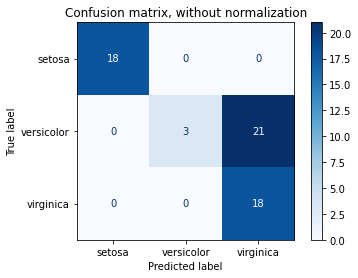

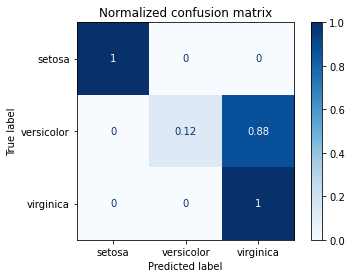

In [19]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier2 = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize1 in titles_options:
    disp = plot_confusion_matrix(classifier2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize1)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [20]:
print_score(classifier1,X_train, y_train, X_test, y_test, train=True)
print_score(classifier1,X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   1.000000   0.914286  0.966667   0.971429      0.969524
recall      1.0   0.884615   1.000000  0.966667   0.961538      0.966667
f1-score    1.0   0.938776   0.955224  0.966667   0.964666      0.966393
support    32.0  26.000000  32.000000  0.966667  90.000000     90.000000
_______________________________________________
Confusion Matrix: 
 [[32  0  0]
 [ 0 23  3]
 [ 0  0 32]]

Test Result:
Accuracy Score: 88.33%
_______________________________________________
CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   1.000000   0.720000  0.883333   0.906667      0.916000
recall      1.0   0.708333   1.000000  0.883333   0.902778      0.883333
f1-score    1.0   0.829268   0.837209  0.883333   0.888826      0.882870
support    18.0  24.00

In [ ]:
#Comment: Kernel which minimizes the regular hinge loss performs better than kernel which minimizes 
#square hinge loss. Another observation is for too regularized (C too low) model, the model performs poorly. 

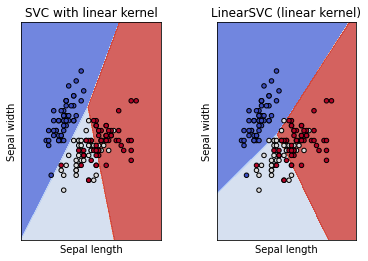

In [22]:
#2D projection of the iris dataset. We only consider the first 2 features of this dataset:Sepal length,Sepal width
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X_1=df.data[:,:2]
C = 0.5462277 # SVM regularization parameter
models=(svm.SVC(kernel='linear',C=C),
        svm.LinearSVC(C=C,max_iter=10000))
models = (clf1.fit(X_1, y) for clf1 in models)

# title for the plots
titles = ('SVC with linear kernel',
        'LinearSVC (linear kernel)')
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_1[:, 0], X_1[:, 1]
xx, yy = make_meshgrid(X0, X1)

#for clf, title, ax in zip (model, title, sub.flatten()):

#for clf, title, ax in zip(model, title, sub.flatten()):
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
